In [20]:
#  import data
import pandas as pd
df=pd.read_csv("C:/Downloads/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [21]:
df.shape

(918, 12)

In [22]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [25]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [27]:
import numpy as np

cols_with_zero = ['RestingBP', 'Cholesterol', 'MaxHR']

df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)


In [28]:
df[cols_with_zero].isnull().sum()


RestingBP        1
Cholesterol    172
MaxHR            0
dtype: int64

In [29]:

df['RestingBP'] = df['RestingBP'].fillna(df['RestingBP'].median())

df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())

df['MaxHR'] = df['MaxHR'].fillna(df['MaxHR'].median())

In [30]:
df[['RestingBP', 'Cholesterol', 'MaxHR']].isnull().sum()


RestingBP      0
Cholesterol    0
MaxHR          0
dtype: int64

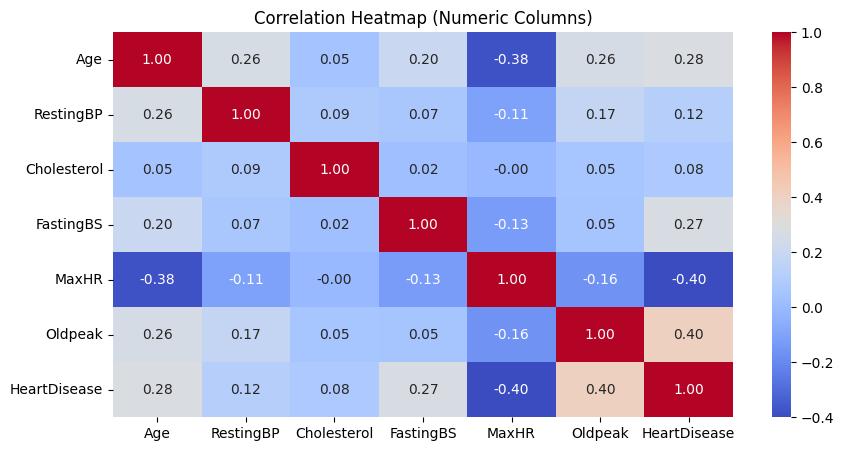

In [31]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

#### Strongest predictors of Heart Disease (numeric) in this dataset:

Oldpeak (0.40) → ST depression

MaxHR (-0.40) → Lower max heart rate

Age (0.28) → Older age

#### Weak predictors:

RestingBP, Cholesterol, FastingBS

#### Implications:

Patients with higher ST depression and lower maximum heart rate are more likely to have heart disease.

Age is a moderate risk factor.

Cholesterol may need additional feature engineering (e.g., grouping or thresholding) as its linear correlation is weak.

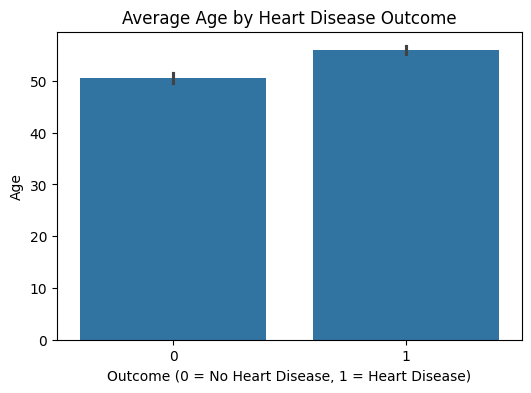

In [32]:
# Bar Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x='HeartDisease', y='Age', data=df)  # Assuming 'target' column indicates heart disease
plt.title("Average Age by Heart Disease Outcome")
plt.xlabel("Outcome (0 = No Heart Disease, 1 = Heart Disease)")
plt.ylabel("Age")
plt.show()

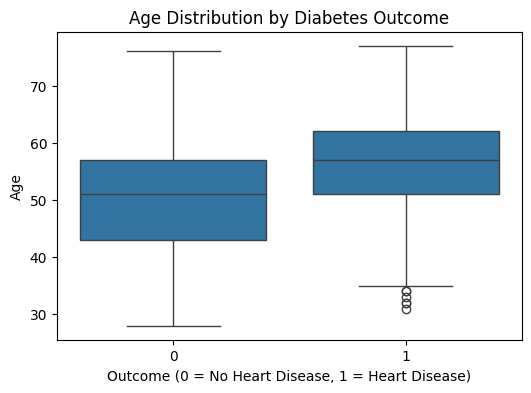

In [33]:
# boxplot 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Outcome (0 = No Heart Disease, 1 = Heart Disease)")
plt.ylabel("Age")
plt.show()

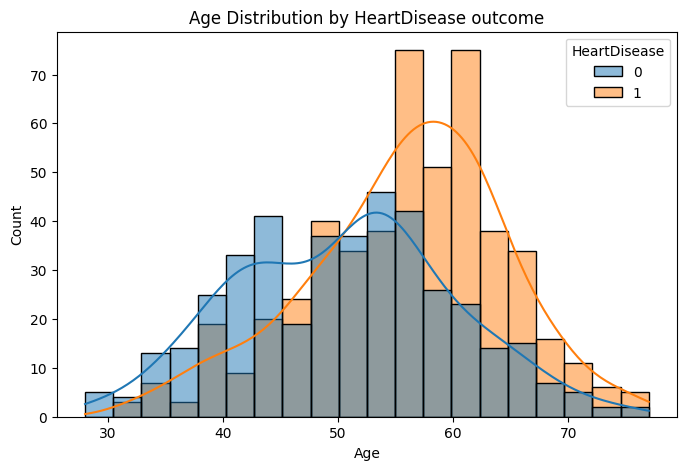

In [34]:
# histogram 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="HeartDisease", bins=20, kde=True)
plt.title("Age Distribution by HeartDisease outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

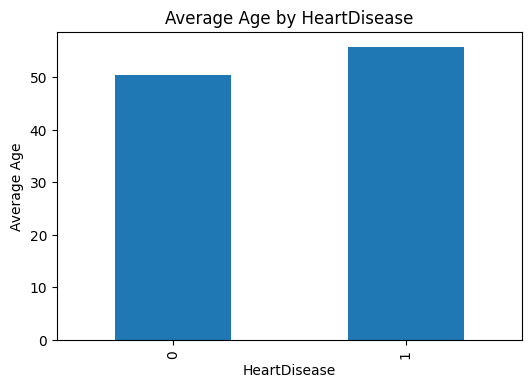

In [35]:
df.groupby("HeartDisease")["Age"].mean().plot(kind="bar", figsize=(6,4))
plt.ylabel("Average Age")
plt.title("Average Age by HeartDisease")
plt.show()

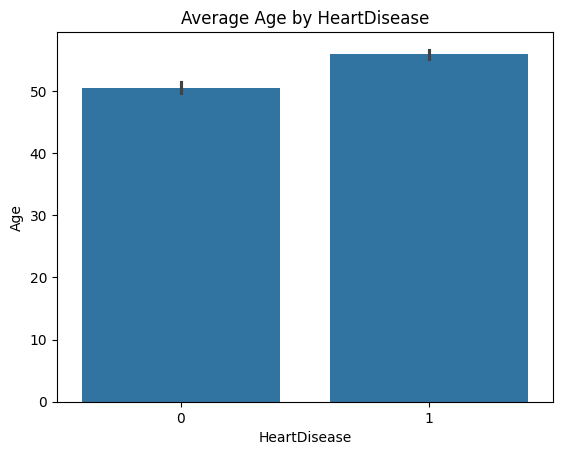

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="HeartDisease", y="Age", data=df, estimator=np.mean)
plt.title("Average Age by HeartDisease")
plt.show()

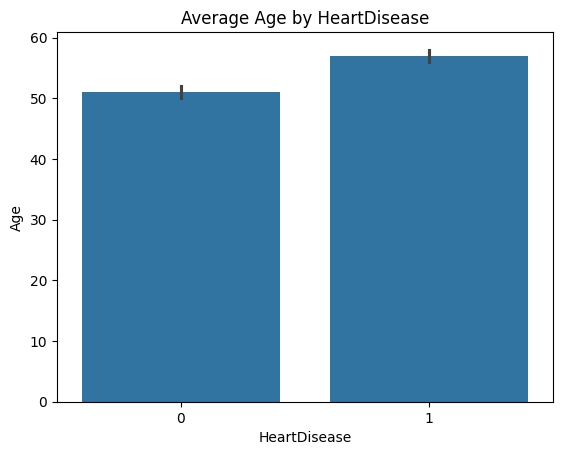

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="HeartDisease", y="Age", data=df, estimator=np.median)
plt.title("Average Age by HeartDisease")
plt.show()


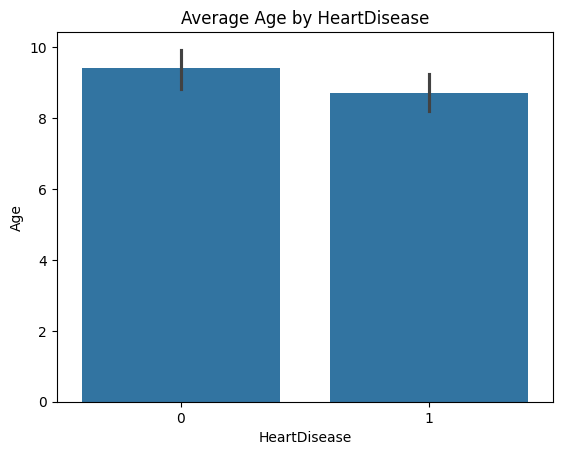

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="HeartDisease", y="Age", data=df, estimator=np.std)
plt.title("Average Age by HeartDisease")
plt.show()

In [39]:
df['Age'].groupby(df['HeartDisease']).mean()

HeartDisease
0    50.551220
1    55.899606
Name: Age, dtype: float64

In [40]:
df['Age'].groupby(df['HeartDisease']).count()

HeartDisease
0    410
1    508
Name: Age, dtype: int64

In [41]:
df['Age'].groupby(df['HeartDisease']).median()

HeartDisease
0    51.0
1    57.0
Name: Age, dtype: float64

In [42]:
df['Age'].groupby(df['HeartDisease']).std()

HeartDisease
0    9.444915
1    8.727056
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='HeartDisease'>

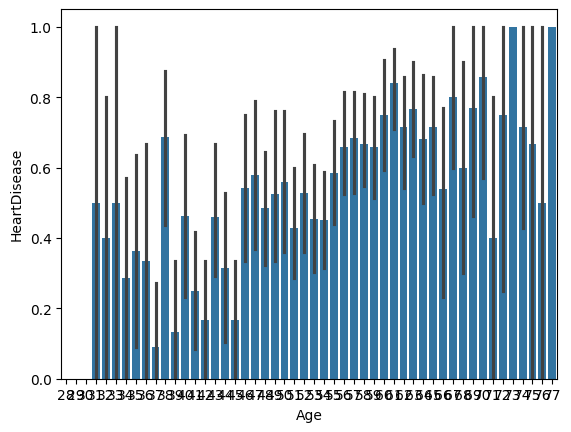

In [43]:
sns.barplot(x=df['Age'],y=df['HeartDisease'],estimator='mean')

<Axes: xlabel='Age'>

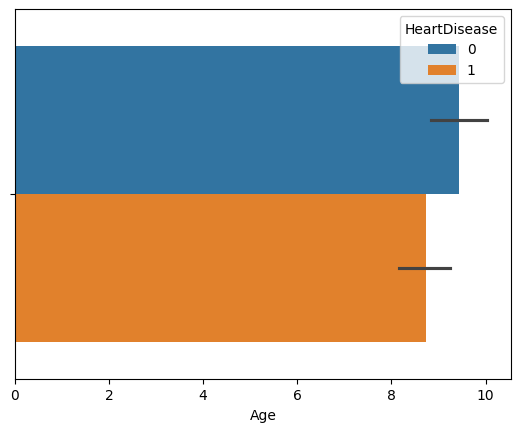

In [44]:
sns.barplot(x=df['Age'],hue=df['HeartDisease'],estimator='std')

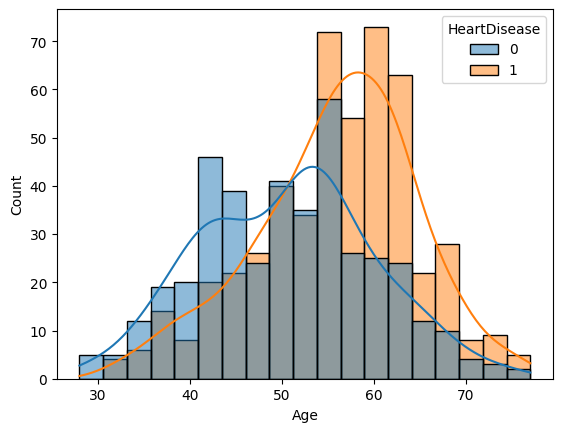

In [45]:
sns.histplot(x='Age',hue='HeartDisease',data=df,kde=True)
plt.show()

In [46]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [48]:
hd_age=df['Age'][df['HeartDisease']==1]
nonhd_age=df['Age'][df['HeartDisease']==0]

In [50]:
# H0: Both data are same
# H1: Both are not same 
from scipy.stats import ttest_ind
stat,p=ttest_ind(hd_age,nonhd_age)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print("Accept H0")

Reject H0


In [52]:
df['RestingBP'].groupby(df['HeartDisease']).mean()

HeartDisease
0    130.180488
1    134.440945
Name: RestingBP, dtype: float64

In [53]:
df['RestingBP'].groupby(df['HeartDisease']).std()


HeartDisease
0    16.499585
1    18.911151
Name: RestingBP, dtype: float64

<Axes: xlabel='RestingBP', ylabel='HeartDisease'>

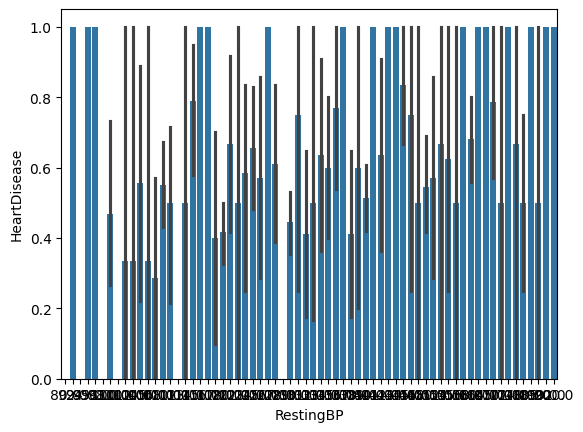

In [54]:
sns.barplot(x=df['RestingBP'],y=df['HeartDisease'],estimator='mean')


<Axes: xlabel='RestingBP', ylabel='HeartDisease'>

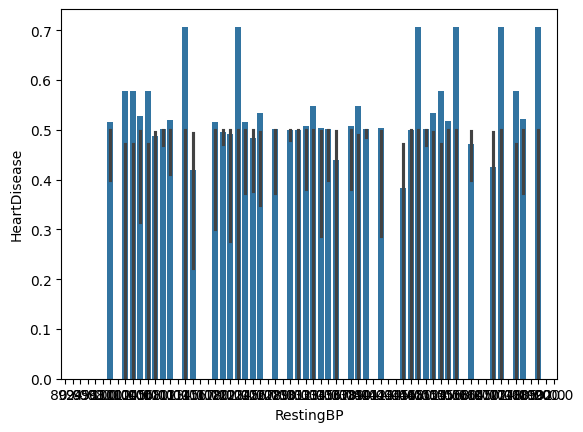

In [55]:
sns.barplot(x=df['RestingBP'],y=df['HeartDisease'],estimator='std')


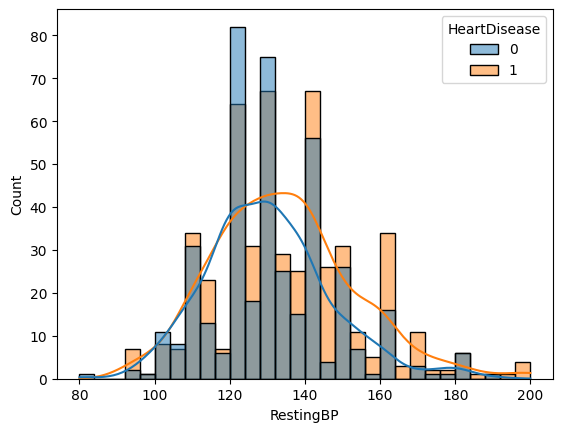

In [56]:
sns.histplot(x='RestingBP',hue='HeartDisease',data=df,kde=True)
plt.show()

In [57]:
hd_rbp=df['RestingBP'][df['HeartDisease']==1]
nonhd_rbp=df['RestingBP'][df['HeartDisease']==0]
# H0: Both data are same
# H1: Both are not same 
from scipy.stats import ttest_ind
stat,p=ttest_ind(hd_rbp,nonhd_rbp)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print("Accept H0")

Reject H0


In [58]:
df['Cholesterol'].groupby(df['HeartDisease']).mean()


HeartDisease
0    238.682927
1    246.854331
Name: Cholesterol, dtype: float64

In [59]:
df['Cholesterol'].groupby(df['HeartDisease']).std()


HeartDisease
0    54.024598
1    52.663331
Name: Cholesterol, dtype: float64

<Axes: xlabel='Cholesterol', ylabel='HeartDisease'>

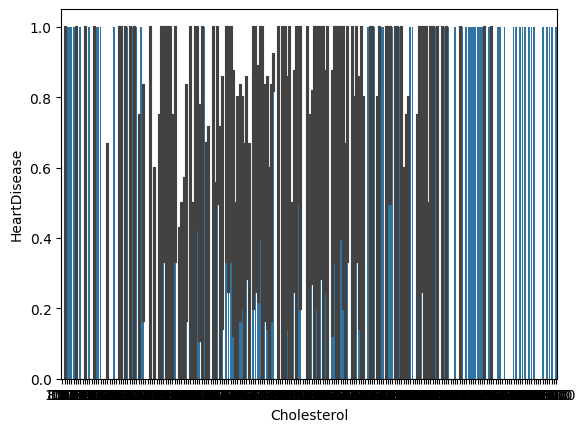

In [60]:
sns.barplot(x=df['Cholesterol'],y=df['HeartDisease'],estimator='mean')


<Axes: xlabel='Cholesterol', ylabel='HeartDisease'>

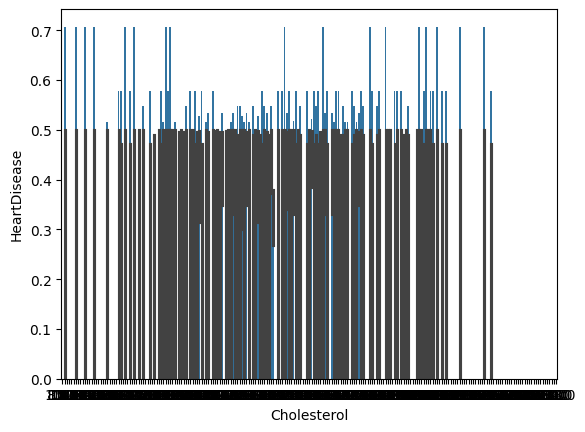

In [61]:
sns.barplot(x=df['Cholesterol'],y=df['HeartDisease'],estimator='std')


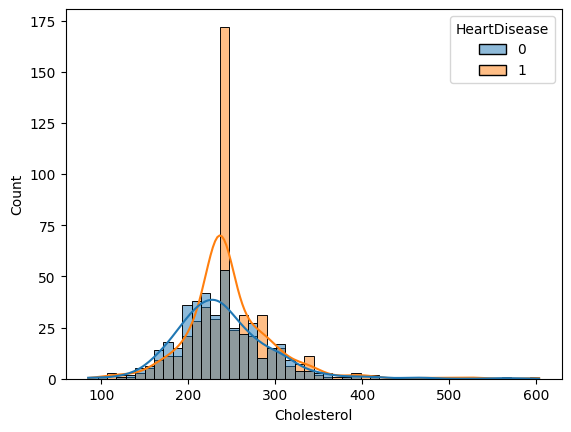

In [62]:
sns.histplot(x='Cholesterol',hue='HeartDisease',data=df,kde=True)
plt.show()

In [63]:
hd_chl=df['Cholesterol'][df['HeartDisease']==1]
nonhd_chl=df['Cholesterol'][df['HeartDisease']==0]
# H0: Both data are same
# H1: Both are not same 
from scipy.stats import ttest_ind
stat,p=ttest_ind(hd_chl,nonhd_chl)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print("Accept H0")

Reject H0


In [64]:
df['MaxHR'].groupby(df['HeartDisease']).mean()


HeartDisease
0    148.151220
1    127.655512
Name: MaxHR, dtype: float64

In [65]:
df['MaxHR'].groupby(df['HeartDisease']).std()


HeartDisease
0    23.288067
1    23.386923
Name: MaxHR, dtype: float64

<Axes: xlabel='MaxHR', ylabel='HeartDisease'>

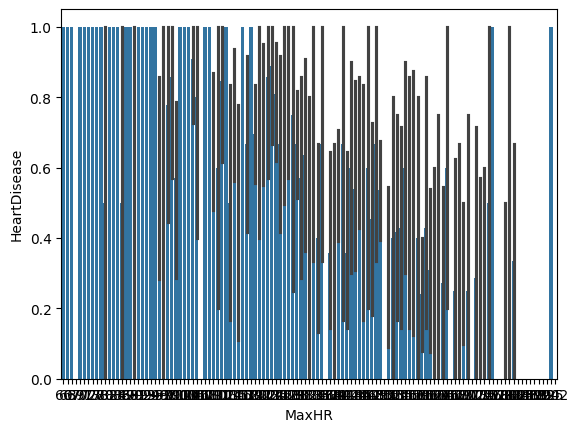

In [66]:
sns.barplot(x=df['MaxHR'],y=df['HeartDisease'],estimator='mean')


<Axes: xlabel='MaxHR', ylabel='HeartDisease'>

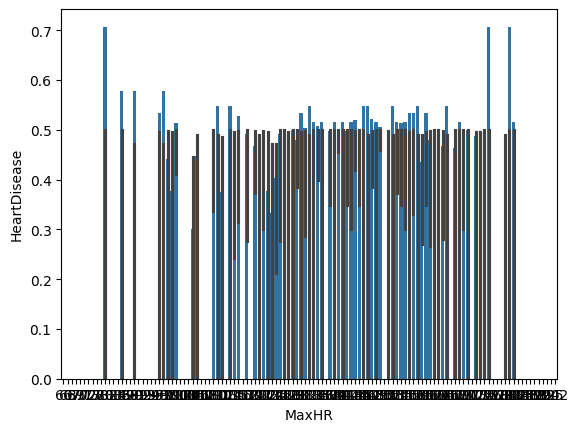

In [67]:
sns.barplot(x=df['MaxHR'],y=df['HeartDisease'],estimator='std')


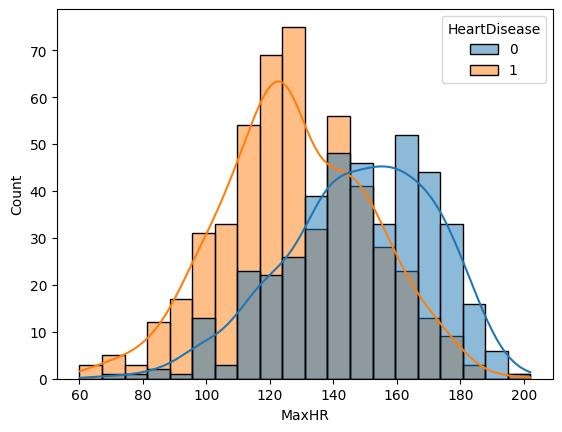

In [68]:
sns.histplot(x='MaxHR',hue='HeartDisease',data=df,kde=True)
plt.show()

In [69]:
hd_mhr=df['MaxHR'][df['HeartDisease']==1]
nonhd_mhr=df['MaxHR'][df['HeartDisease']==0]
# H0: Both data are same
# H1: Both are not same 
from scipy.stats import ttest_ind
stat,p=ttest_ind(hd_mhr,nonhd_mhr)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print("Accept H0")

Reject H0


In [70]:
df['Oldpeak'].groupby(df['HeartDisease']).mean()



HeartDisease
0    0.408049
1    1.274213
Name: Oldpeak, dtype: float64

In [71]:
df['Oldpeak'].groupby(df['HeartDisease']).std()


HeartDisease
0    0.699709
1    1.151872
Name: Oldpeak, dtype: float64

<Axes: xlabel='Oldpeak', ylabel='HeartDisease'>

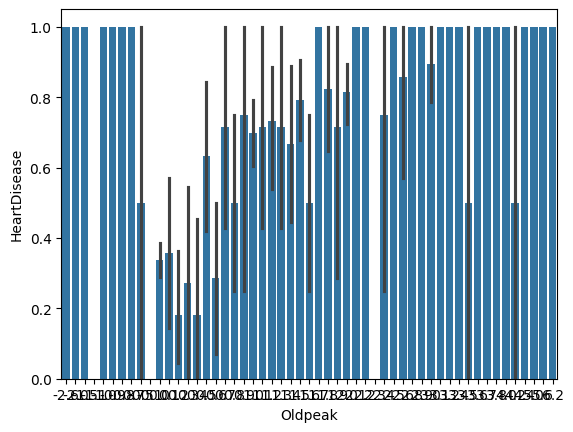

In [72]:
sns.barplot(x=df['Oldpeak'],y=df['HeartDisease'],estimator='mean')


<Axes: xlabel='Oldpeak', ylabel='HeartDisease'>

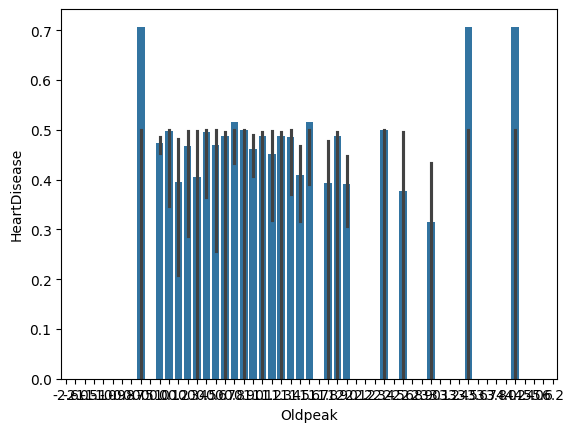

In [73]:
sns.barplot(x=df['Oldpeak'],y=df['HeartDisease'],estimator='std')


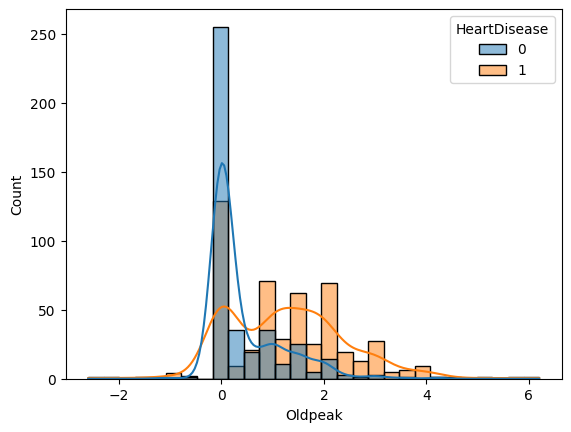

In [74]:
sns.histplot(x='Oldpeak',hue='HeartDisease',data=df,kde=True)
plt.show()

In [75]:
hd_op=df['Oldpeak'][df['HeartDisease']==1]
nonhd_op=df['Oldpeak'][df['HeartDisease']==0]
# H0: Both data are same
# H1: Both are not same 
from scipy.stats import ttest_ind
stat,p=ttest_ind(hd_op,nonhd_op)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print("Accept H0")

Reject H0


In [76]:
df['FastingBS'].groupby(df['HeartDisease']).mean()


HeartDisease
0    0.107317
1    0.334646
Name: FastingBS, dtype: float64

In [77]:
df['FastingBS'].groupby(df['HeartDisease']).std()


HeartDisease
0    0.309894
1    0.472332
Name: FastingBS, dtype: float64

<Axes: xlabel='FastingBS', ylabel='HeartDisease'>

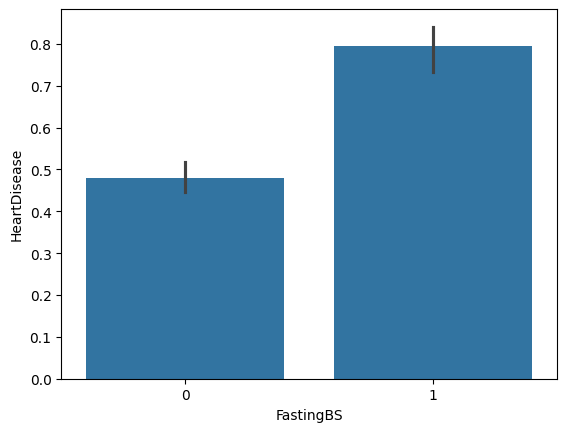

In [78]:
sns.barplot(x=df['FastingBS'],y=df['HeartDisease'],estimator='mean')


<Axes: xlabel='FastingBS', ylabel='HeartDisease'>

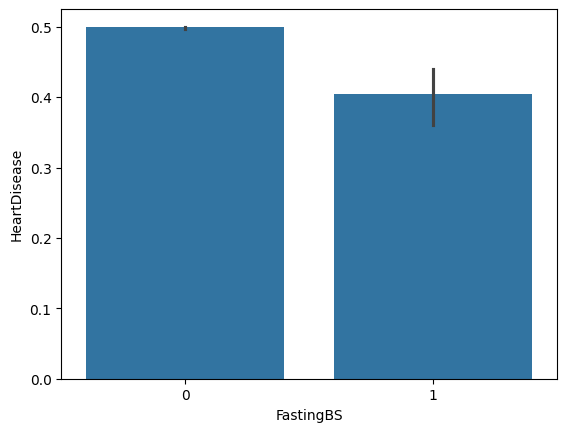

In [79]:
sns.barplot(x=df['FastingBS'],y=df['HeartDisease'],estimator='std')


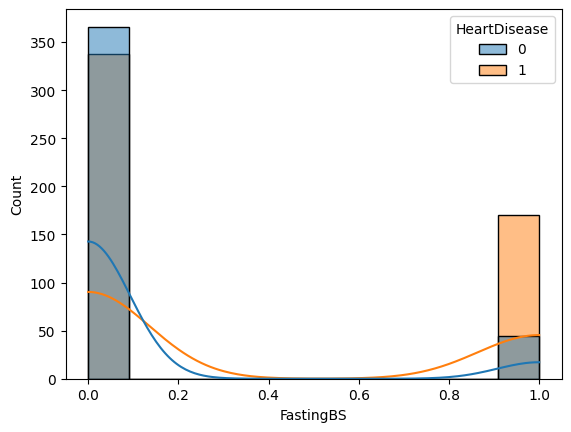

In [80]:
sns.histplot(x='FastingBS',hue='HeartDisease',data=df,kde=True)
plt.show()

In [81]:
hd_fbs=df['FastingBS'][df['HeartDisease']==1]
nonhd_fbs=df['FastingBS'][df['HeartDisease']==0]
# H0: Both data are same
# H1: Both are not same 
from scipy.stats import ttest_ind
stat,p=ttest_ind(hd_fbs,nonhd_fbs)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print("Accept H0")


Reject H0


In [83]:
def remove_outliers_iqr(df):
    # Select only numeric columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    # Create mask for rows without outliers
    mask = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | 
             (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    
    return df[mask]
df = remove_outliers_iqr(df)



In [84]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)

In [85]:
IQR = Q3 - Q1

# Step 3: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [91]:
Age_outliers = df[
    (df["Age"] < lower_bound) |
    (df["Age"] > upper_bound)
]
print("Number of Outliers:", Age_outliers.shape[0])

Number of Outliers: 0


In [92]:
RestingBP_outliers = df[
    (df["RestingBP"] < lower_bound) |
    (df["RestingBP"] > upper_bound)
]
print("Number of Outliers:", RestingBP_outliers.shape[0])

Number of Outliers: 643


In [93]:
Cholesterol_outliers = df[
    (df["Cholesterol"] < lower_bound) |
    (df["Cholesterol"] > upper_bound)
]
print("Number of Outliers:", Cholesterol_outliers.shape[0])

Number of Outliers: 643


In [94]:
FastingBS_outliers = df[
    (df["FastingBS"] < lower_bound) |
    (df["FastingBS"] > upper_bound)
]
print("Number of Outliers:", FastingBS_outliers.shape[0])

Number of Outliers: 643


In [95]:
MaxHR_outliers = df[
    (df["MaxHR"] < lower_bound) |
    (df["MaxHR"] > upper_bound)
]
print("Number of Outliers:", MaxHR_outliers.shape[0])

Number of Outliers: 639


In [96]:
Oldpeak_outliers = df[
    (df["Oldpeak"] < lower_bound) |
    (df["Oldpeak"] > upper_bound)
]
print("Number of Outliers:", Oldpeak_outliers.shape[0])

Number of Outliers: 643


In [100]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('HeartDisease')


In [101]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [103]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [105]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [106]:
y_pred_train=model.predict(X_train)

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [108]:
accuracy_score(y_train,y_pred_train)


0.8577777777777778

In [109]:
y_pred_test=model.predict(X_test)


In [110]:
accuracy_score(y_test,y_pred_test)  


0.8652849740932642

<Axes: >

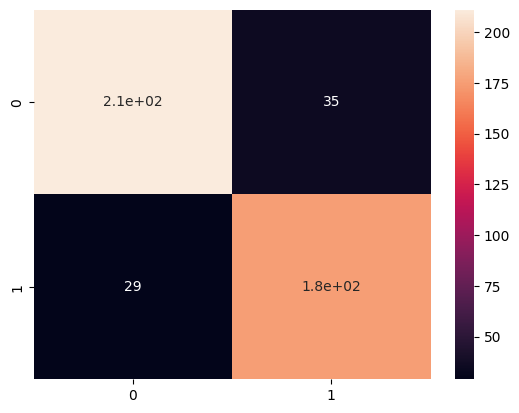

In [111]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True)


In [112]:
confusion_matrix(y_train,y_pred_train)


array([[211,  35],
       [ 29, 175]])

<Axes: >

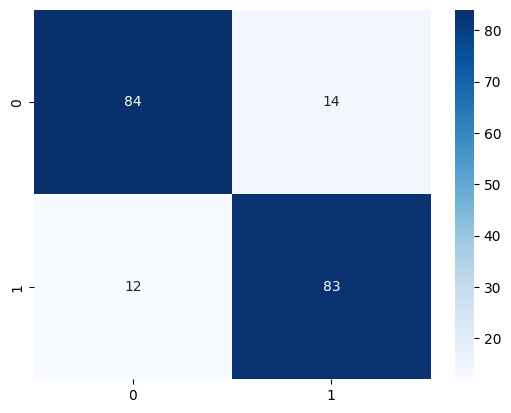

In [113]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,cmap='Blues')

In [114]:
confusion_matrix(y_test,y_pred_test)

array([[84, 14],
       [12, 83]])

In [115]:
y_pred_prob=model.predict_proba(X_test)
y_pred_prob

array([[0.73595404, 0.26404596],
       [0.10282858, 0.89717142],
       [0.1397619 , 0.8602381 ],
       [0.15253114, 0.84746886],
       [0.19291649, 0.80708351],
       [0.84732951, 0.15267049],
       [0.93186549, 0.06813451],
       [0.08637155, 0.91362845],
       [0.54676252, 0.45323748],
       [0.46099509, 0.53900491],
       [0.0621868 , 0.9378132 ],
       [0.06220684, 0.93779316],
       [0.95138267, 0.04861733],
       [0.038185  , 0.961815  ],
       [0.71670653, 0.28329347],
       [0.14036879, 0.85963121],
       [0.07516843, 0.92483157],
       [0.1660157 , 0.8339843 ],
       [0.29025274, 0.70974726],
       [0.97116201, 0.02883799],
       [0.32391279, 0.67608721],
       [0.95065655, 0.04934345],
       [0.18895475, 0.81104525],
       [0.95457868, 0.04542132],
       [0.32139749, 0.67860251],
       [0.65899736, 0.34100264],
       [0.93372255, 0.06627745],
       [0.31857809, 0.68142191],
       [0.09618281, 0.90381719],
       [0.22527209, 0.77472791],
       [0.

In [116]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report

In [117]:
precision_score(y_test,y_pred_test)

0.8556701030927835

In [118]:
recall_score(y_test,y_pred_test)

0.8736842105263158

In [119]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.86      0.87      0.86        95

    accuracy                           0.87       193
   macro avg       0.87      0.87      0.87       193
weighted avg       0.87      0.87      0.87       193



In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [121]:
X_test.shape

(193, 15)

In [122]:
model.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [123]:
y_prob = model.predict_proba(X_test)[:, 1]    # probablity of positive class 
y_prob

array([0.26404596, 0.89717142, 0.8602381 , 0.84746886, 0.80708351,
       0.15267049, 0.06813451, 0.91362845, 0.45323748, 0.53900491,
       0.9378132 , 0.93779316, 0.04861733, 0.961815  , 0.28329347,
       0.85963121, 0.92483157, 0.8339843 , 0.70974726, 0.02883799,
       0.67608721, 0.04934345, 0.81104525, 0.04542132, 0.67860251,
       0.34100264, 0.06627745, 0.68142191, 0.90381719, 0.77472791,
       0.80821476, 0.03343453, 0.61643238, 0.76030089, 0.09424317,
       0.63197521, 0.82530319, 0.31761708, 0.08224214, 0.85176974,
       0.31791622, 0.1165351 , 0.50977604, 0.50118265, 0.24662385,
       0.07167041, 0.94929038, 0.03968602, 0.25658919, 0.04335439,
       0.02946675, 0.04123037, 0.91519371, 0.9286659 , 0.83240594,
       0.2252788 , 0.03170645, 0.87149213, 0.59202022, 0.05533788,
       0.0116986 , 0.07008718, 0.12760538, 0.03855564, 0.0868845 ,
       0.86560028, 0.27878069, 0.2549653 , 0.04396559, 0.0535777 ,
       0.09059492, 0.03977236, 0.72851589, 0.76274564, 0.91443

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


In [125]:
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)


AUC Score: 0.9271750805585391


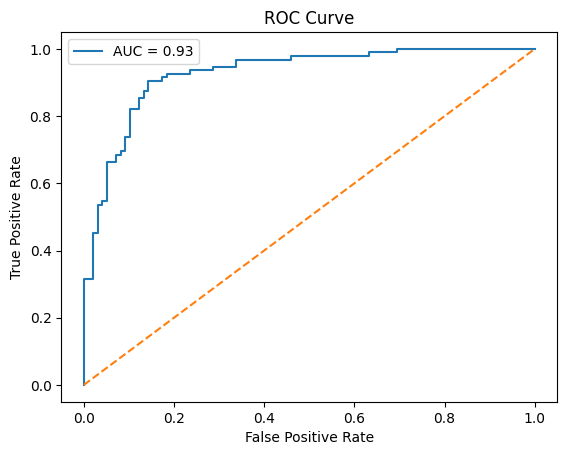

In [126]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
